   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


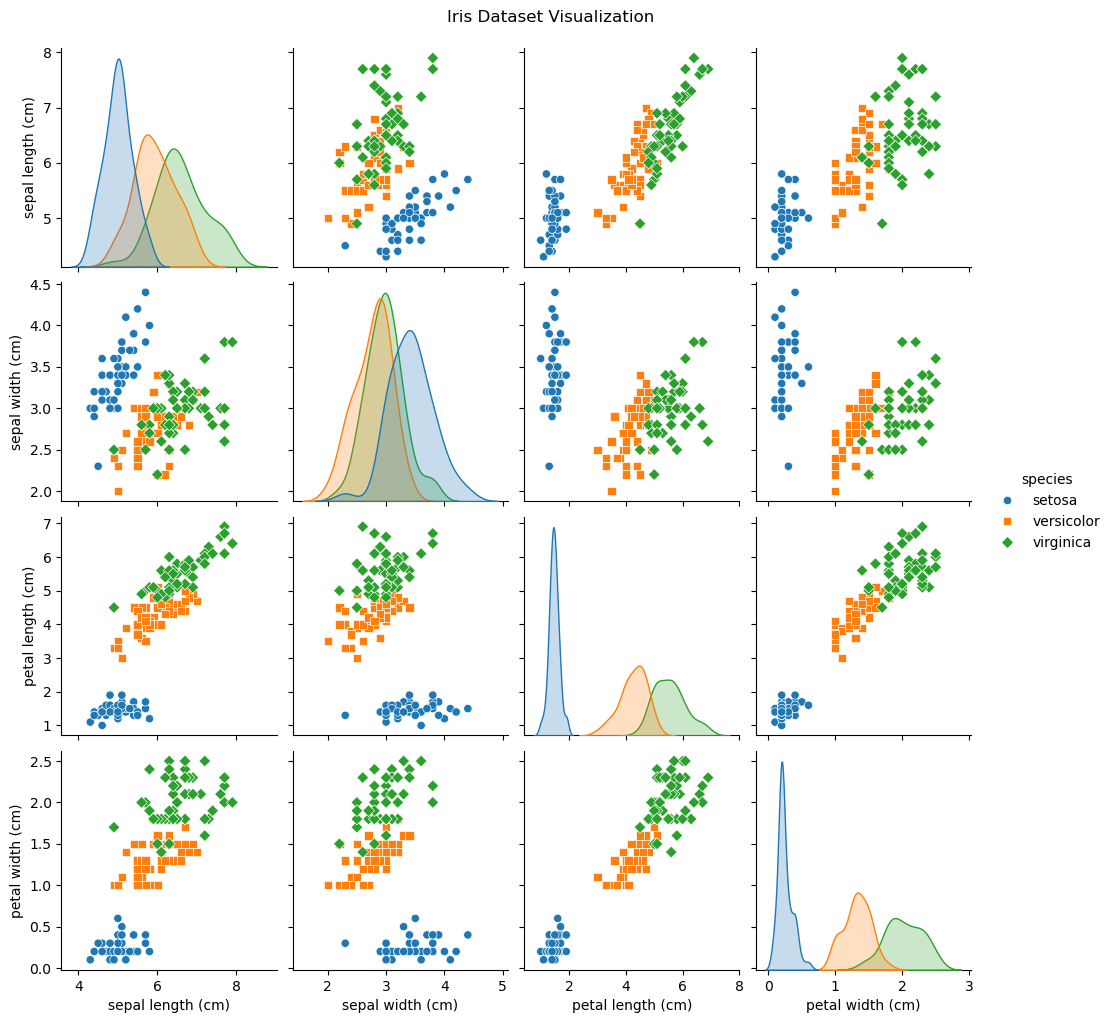

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

# Display the first few rows of the dataset
print(df.head())

# Pairplot to visualize the dataset
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Iris Dataset Visualization", y=1.02)
plt.show()

# K-nearest neighbors

In [1]:
import math

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def k_nearest_neighbors(data, query, k):
    """Find the k nearest neighbors of query point."""
    neighbor_distances_and_indices = []

    # Step 1: Calculate the distance between the query and each point in the data.
    for index, example in enumerate(data):
        distance = euclidean_distance(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))

    # Step 2: Sort by distance and return the indices of the first k neighbors.
    sorted_neighbors = sorted(neighbor_distances_and_indices)
    k_nearest_indices = [index for _, index in sorted_neighbors[:k]]
    return k_nearest_indices

def predict_classification(data, query, k):
    """Predict the class of the query point based on k nearest neighbors."""
    k_nearest_indices = k_nearest_neighbors(data, query, k)
    k_nearest_labels = [data[i][-1] for i in k_nearest_indices]
    return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Data: [Annual Income, Credit Score, Loan Approval]
data = [
    [60, 690, 'No'],
    [80, 700, 'Yes'],
    [75, 710, 'Yes'],
    [45, 680, 'No'],
    [90, 730, 'Yes']
]

# Query: New customer data
query = [70, 705]
k = 3  # Number of neighbors

# Perform K-NN classification
predicted_approval = predict_classification(data, query, k)
predicted_approval

'Yes'

# Decision tree

In [4]:
from collections import Counter, defaultdict

def entropy(class_probabilities):
    """Calculate the entropy of a partition."""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p != 0)

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count for count in Counter(labels).values()]

def data_entropy(data):
    labels = [label for _, label in data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

def partition_entropy(subsets):
    """Find the entropy from this partition of data into subsets."""
    total_count = sum(len(subset) for subset in subsets)
    return sum(data_entropy(subset) * len(subset) / total_count for subset in subsets)

def partition_by(inputs, attribute):
    """Partition the inputs into lists based on the specified attribute."""
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input)
    return groups

def partition_entropy_by(inputs, attribute):
    """Compute the entropy corresponding to the given partition."""
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

def classify(tree, input):
    """Classify the input using the given decision tree."""
    if tree in ['Yes', 'No']:
        return tree

    attribute, subtree_dict = tree
    subtree_key = input.get(attribute)

    if subtree_key not in subtree_dict:
        subtree_key = None

    subtree = subtree_dict[subtree_key]
    return classify(subtree, input)

def build_tree(inputs, split_attributes, target_attribute):
    # Count target labels
    label_counts = Counter(input[1] for input in inputs)
    most_common_label = label_counts.most_common(1)[0][0]

    # If the dataset is pure, return the label
    if len(label_counts) == 1:
        return most_common_label

    # If no more features, return the majority label
    if not split_attributes:
        return most_common_label

    # Otherwise, split by the best attribute
    def split_entropy(attribute):
        return partition_entropy_by(inputs, attribute)

    best_attribute = min(split_attributes, key=split_entropy)
    partitions = partition_by(inputs, best_attribute)
    new_attributes = [a for a in split_attributes if a != best_attribute]

    # Recursively build the subtrees
    subtrees = {attribute_value: build_tree_id3(subset, new_attributes, target_attribute)
                for attribute_value, subset in partitions.items()}

    subtrees[None] = most_common_label

    return (best_attribute, subtrees)

# Example usage
inputs = [
    ({'Annual Income': 60, 'Credit Score': 690}, 'No'),
    ({'Annual Income': 80, 'Credit Score': 700}, 'Yes'),
    ({'Annual Income': 75, 'Credit Score': 710}, 'Yes'),
    ({'Annual Income': 45, 'Credit Score': 680}, 'No'),
    ({'Annual Income': 90, 'Credit Score': 730}, 'Yes')
]

tree = build_tree(inputs, ['Annual Income', 'Credit Score'], 'Loan Approved')

# Predict for a new customer
new_customer = {'Annual Income': 70, 'Credit Score': 705}
predict = classify(tree, new_customer)
predict


'Yes'

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = np.array([
    [55, 710],
    [45, 680],
    [85, 720],
    [40, 695],
    [60, 705],
    [75, 740],
    [30, 660],
    [90, 750],
    [50, 700],
    [35, 670],
    [60, 690],
    [80, 700],
    [75, 710],
    [45, 680],
    [90, 730]
])

y = np.array([
    'Yes',
    'No',
    'Yes',
    'No',
    'Yes',
    'Yes',
    'No',
    'Yes',
    'Yes',
    'No',
    'No',
    'Yes',
    'Yes',
    'No',
    'Yes'
])


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model with the training data
clf.fit(X_train, y_train)

# Predict with the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred, accuracy

(array(['No', 'Yes', 'Yes'], dtype='<U3'), 1.0)

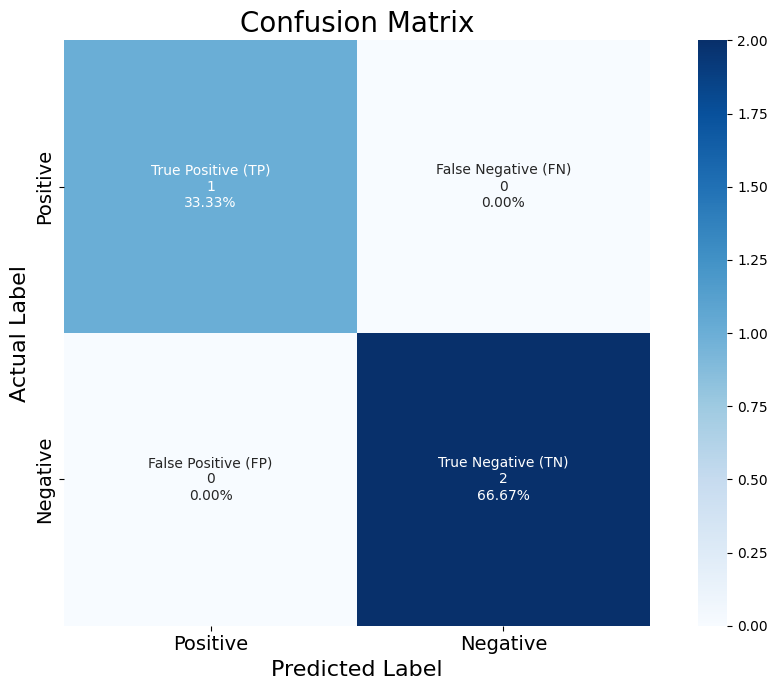

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Create labels for the axes
group_names = ['True Positive (TP)', 'False Negative (FN)', 'False Positive (FP)', 'True Negative (TN)']
group_counts = [f"{value}" for value in conf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 7))

# Create the heatmap
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax, square=True)

# Set axis labels
ax.set_xlabel('Predicted Label', fontsize=16)
ax.set_ylabel('Actual Label', fontsize=16)

# Set tick labels
ax.set_xticklabels(['Positive', 'Negative'], fontsize=14)
ax.set_yticklabels(['Positive', 'Negative'], fontsize=14, va='center')

# Add title
plt.title('Confusion Matrix', fontsize=20)

# Adjust layout to make room for the title and axis labels
plt.tight_layout()

# Display the plot
plt.show()


In [6]:
# Predict for a new customer
new_customer = np.array([[70, 705]])
predict = clf.predict(new_customer)
predict

array(['Yes'], dtype='<U3')

# Decision tree for regression

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define the dataset
data = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Hours Played': [26, 30, 48, 46, 62, 23, 43, 36, 38, 48, 48, 62, 44, 30]
})

# Preprocess the dataset
# Convert categorical variables to numerical values using one-hot encoding
enc = OneHotEncoder()
X_categorical = enc.fit_transform(data[['Outlook', 'Temp', 'Humidity', 'Windy']]).toarray()

# Combine with the numerical data (in this case, there are no additional numerical features)
X = X_categorical
y = data['Hours Played'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict the target
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Output the mean squared error
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 380.0


# Random Forest

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
})

# Preprocess the dataset
enc = OneHotEncoder()
X = enc.fit_transform(data[['Outlook', 'Temp', 'Humidity', 'Windy']]).toarray()
y = data['Play'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict the target
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


# LGBM

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

# Define the dataset with a categorical target
data = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
})

# Preprocess the dataset
enc = OneHotEncoder()
X = enc.fit_transform(data[['Outlook', 'Temp', 'Humidity', 'Windy']])

# Encode the target variable
y = data['Play'].apply(lambda x: 1 if x == 'Yes' else 0).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# Train the model with early stopping
lgb_classifier.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=3)
    ]
)

# Predict the target on the test set
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy: {accuracy:.2f}")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 6, number of negative: 5
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 11, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requ

# K-means

In [5]:
import random

def k_means(data, k, max_iterations=100):
    # Randomly select initial centroids
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Assign points to the nearest centroid
        clusters = {i: [] for i in range(k)}
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)
        
        # Recalculate centroids
        new_centroids = []
        for cluster in clusters.values():
            centroid = tuple(map(lambda x: sum(x) / len(cluster) if cluster else 0, zip(*cluster)))
            new_centroids.append(centroid)
        
        if new_centroids == centroids:
            break
        else:
            centroids = new_centroids
    
    return clusters

def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

data = [(1, 2), (1, 4), (1, 0),
        (10, 2), (10, 4), (10, 0)]
clusters = k_means(data, k=2)
print(clusters)

{0: [(10, 2), (10, 4), (10, 0)], 1: [(1, 2), (1, 4), (1, 0)]}


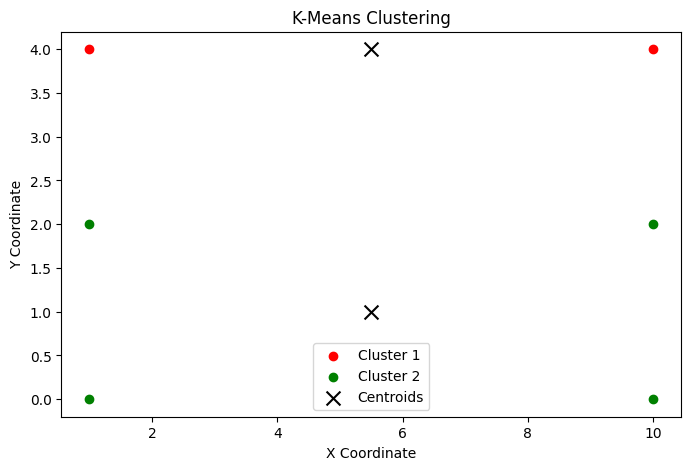

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

def k_means(data, k, max_iterations=100):
    # Randomly select initial centroids
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Assign points to the nearest centroid
        clusters = {i: [] for i in range(k)}
        for point in data:
            distances = [np.linalg.norm(np.array(point) - np.array(centroid)) for centroid in centroids]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)
        
        # Recalculate centroids
        new_centroids = []
        for cluster in clusters.values():
            centroid = tuple(np.mean(cluster, axis=0) if cluster else (0, 0))
            new_centroids.append(centroid)
        
        if np.array_equal(new_centroids, centroids):
            break
        else:
            centroids = new_centroids
    
    return clusters, centroids

# Example usage with sample data
data = [(1, 2), (1, 4), (1, 0),
        (10, 2), (10, 4), (10, 0)]
k = 2
clusters, centroids = k_means(data, k)

# Visualization
plt.figure(figsize=(8, 5))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, cluster in clusters.items():
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

